<a href="https://colab.research.google.com/github/Criell/Data/blob/master/pandas_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!rm -r Panda_Adv
#!wget https://github.com/Criell/Data/blob/master/06_Panda_Adv/Panda_Adv.zip?raw=true
#!unzip Panda_Adv.zip\?raw\=true -d Panda_Adv

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#!conda install --yes --prefix {sys.prefix} geopandas
#!conda install -c conda-forge --yes --prefix {sys.prefix} mplleaflet

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
try: 
    import geopandas as gpd
    from shapely.geometry import Point
except:
    !pip install geopandas
    import geopandas as gpd
    from shapely.geometry import Point
try:
    import mplleaflet
except:
    !pip install mplleaflet
    import mplleaflet

     |████████████████████████████████| 962kB 7.9MB/s 
     |████████████████████████████████| 14.7MB 308kB/s 
     |████████████████████████████████| 10.9MB 50.4MB/s 
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28556 sha256=42b05c8203c2b653a4c0889b21ae37383cd95f1bdb4cb209e6e24c62dac778e0
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


![](attachment:Panda_Adv/mioti.png)
<img src="Panda_Adv/mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy5 Pandas IoT I. Challenge. 

Vamos a practicar series temporales con los [datos del "Sistema Integral de la Calidad del Aire del Ayuntamiento de Madrid"](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=41e01e007c9db410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) que publica su portal de datos abiertos.

El objetivo de la práctica es ver cómo varió la presencia de monóxido de carbono (CO) en las mediciones realizadas por una estación de calidad del aire de dentro de Madrid Central, en torno a la fecha en que se activó por primera vez la restricción. **¿Disminuyó la concentracion de CO en el aire tras la aplicación de Madrid Central?**



## Inicialización

La siguiente celda instalará geopandas y mplleaflet si no están instalados ya:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)
from pathlib import Path


## Pasos

### Carga de los datos

Madrid Central entró en vigor el **30 de noviembre de 2018**. Desafortunadamente, los datos vienen en este caso en CSV por mes. **Lee todos los CSVs de 2018 y 2019 en un único dataframe.**


In [ ]:
init = True
s = pd.Series(["ene","feb","mar", "abr", "may" , "jun", "jul", "ago", "sep"], name="mes")
names = "/content/drive/My Drive/Data/Anio201810/" + s + "_mo18.csv" 
add = "/content/drive/My Drive/Data/Anio201908/" + s + "_mo19.csv"
names = names.append(add, ignore_index=True)

#for csv_file in Path('.').glob('/content/drive/My Drive/Data/Anio*/*.csv'):
for csv_file in names:
  print(csv_file)
  if (init):
    air_q = pd.read_csv(csv_file, delimiter=';')
    init = False
  else:
    air_q = air_q.append(pd.read_csv(csv_file, delimiter=';'), ignore_index=True)
air_q.shape 

/content/drive/My Drive/Data/Anio201810/ene_mo18.csv
/content/drive/My Drive/Data/Anio201810/feb_mo18.csv
/content/drive/My Drive/Data/Anio201810/mar_mo18.csv
/content/drive/My Drive/Data/Anio201810/abr_mo18.csv
/content/drive/My Drive/Data/Anio201810/may_mo18.csv
/content/drive/My Drive/Data/Anio201810/jun_mo18.csv
/content/drive/My Drive/Data/Anio201810/jul_mo18.csv
/content/drive/My Drive/Data/Anio201810/ago_mo18.csv
/content/drive/My Drive/Data/Anio201810/sep_mo18.csv
/content/drive/My Drive/Data/Anio201908/ene_mo19.csv
/content/drive/My Drive/Data/Anio201908/feb_mo19.csv
/content/drive/My Drive/Data/Anio201908/mar_mo19.csv
/content/drive/My Drive/Data/Anio201908/abr_mo19.csv
/content/drive/My Drive/Data/Anio201908/may_mo19.csv
/content/drive/My Drive/Data/Anio201908/jun_mo19.csv
/content/drive/My Drive/Data/Anio201908/jul_mo19.csv
/content/drive/My Drive/Data/Anio201908/ago_mo19.csv
/content/drive/My Drive/Data/Anio201908/sep_mo19.csv


(81863, 56)

El datafreme una vez completado lo anterior, tiene esta pinta: 
<img src="dataset.jpg" style="width: 800px">

### Filtrado

El siguiente plot muestra sobre un mapa la zona a la que aplica Madrid Central, junto con las estaciones de medición de calidad del aire:

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


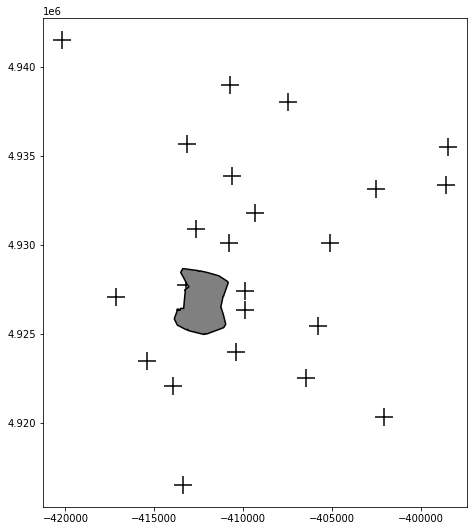

In [ ]:
gdf = gpd.read_file("/content/drive/My Drive/Data/Madrid_Central/Madrid_Central.shp")
gdf = gdf.to_crs(epsg=3857)
est = pd.read_csv("/content/drive/My Drive/Data/estaciones.csv", delimiter=';', encoding='latin-1', decimal='.')
gdf_est = gpd.GeoDataFrame(
    est, 
    geometry=[Point(x, y) for x, y in zip(est.LONGITUD, est.LATITUD)]
)
gdf_est.crs = {'init' :'epsg:4326'}
gdf_est = gdf_est.to_crs(epsg=3857)
ax = gdf.plot(facecolor='grey', edgecolor='black')

ax = gdf_est.plot(ax=ax, marker='+', color='black', markersize=300.0)
#mplleaflet.display(fig=ax.figure)

La única estación que está dentro de Madrid Central plenamente es la de "Pza. del Carmen". **Filtra el dataframe `air_q` para quedarte con la información relativa solo a esa estación**. Busca manualmente qué puedes usar para filtrar en `estacion.csv`, ayudándote de la documentación en el PDF `Interprete_ficheros_ calidad_ del_ aire_global.pdf`. Elimina las columnas `PROVINCIA`, `MUNICIPIO`, `ESTACION`y `PUNTO_MUESTREO`, que ya no las vamos a necesitar.

In [ ]:
cod = est[est['ESTACION'] == 'Pza. del Carmen']
cod.head()
cod = cod.iloc[ 0 , 1]

print('\n', air_q['ESTACION'].unique(), '\n')
air_q = air_q[air_q['ESTACION'] == cod]
print(air_q['ESTACION'].unique())

air_q = air_q.drop(['PROVINCIA','MUNICIPIO','ESTACION','PUNTO_MUESTREO'], axis=1)

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,SO2,CO,PM10,PM2_5,O3,BTX,HC,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,geometry
8,28079035,35,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,UF,Urbana fondo,X,X,X,NaN,NaN,X,NaN,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,POINT (-3.70317 40.41921)



 [ 4  8 11 16 17 18 24 27 35 36 38 39 40 47 48 49 50 54 55 56 57 58 59 60] 

[35]


### Cambio de estructura de los valores de medición

Si atendemos a `Interprete_ficheros_ calidad_ del_ aire_global.pdf`, observamos que las mediciones vienen en un formato con el que no nos va a resultar muy sencillo trabajar: cada fila contiene 24 mediciones (una por hora) de cada uno de los compuestos que se miden en el aire (el compuesto que se mide viene indicado en la columna `MAGNITUD`). Para facilitar que trabajemos con ello, vamos a hacer que cada fila contenga solo una hora (y la medición de esa hora). Por tanto, por cada fila de `air_q`, vamos a tener 24 filas de `unstacked_air_q`:

In [ ]:
unstacked_air_q = air_q.filter(regex="H.*").unstack().reset_index(level=0)
unstacked_air_q.head()

,level_0,0
1941,H01,5.0
1942,H01,6.0
1943,H01,6.0
1944,H01,5.0
1945,H01,5.0


Las nuevas filas de `unstacked_air_q` preservan el índice de la fila a partir del cual se generaron. **Mergea unstacked_air_q con air_q**. Así tendremos air_q con una medición por hora y fila:

In [ ]:
air_q = pd.merge(air_q, unstacked_air_q, left_index=True, right_index=True)
air_q.reset_index(inplace=True)
air_q.head()

,index,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24,level_0,0
0,1941,1,2018,1,1,5.0,V,5.0,V,6.0,V,6.0,V,6.0,V,5.0,V,5.0,V,6.0,V,5.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,7.0,V,8.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,H01,5.0
1,1941,1,2018,1,1,5.0,V,5.0,V,6.0,V,6.0,V,6.0,V,5.0,V,5.0,V,6.0,V,5.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,7.0,V,8.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,H02,5.0
2,1941,1,2018,1,1,5.0,V,5.0,V,6.0,V,6.0,V,6.0,V,5.0,V,5.0,V,6.0,V,5.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,7.0,V,8.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,H03,6.0
3,1941,1,2018,1,1,5.0,V,5.0,V,6.0,V,6.0,V,6.0,V,5.0,V,5.0,V,6.0,V,5.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,7.0,V,8.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,H04,6.0
4,1941,1,2018,1,1,5.0,V,5.0,V,6.0,V,6.0,V,6.0,V,5.0,V,5.0,V,6.0,V,5.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,7.0,V,8.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,6.0,V,H05,6.0


**Elimina ahora todas las columnas "H*" y "V*", que ya no son necesarias**:

In [ ]:
air_q = air_q.loc[ : , ['MAGNITUD','ANO','MES','DIA','level_0', 0 ] ]
air_q.head()

,MAGNITUD,ANO,MES,DIA,level_0,0
0,1,2018,1,1,H01,5.0
1,1,2018,1,1,H02,5.0
2,1,2018,1,1,H03,6.0
3,1,2018,1,1,H04,6.0
4,1,2018,1,1,H05,6.0


**Renombra `level_0` a `HORA` y `0` a VALOR`**:

In [ ]:
air_q = air_q.rename(columns={'level_0': 'HORA', 0: 'VALOR'})
air_q.head()

,MAGNITUD,ANO,MES,DIA,HORA,VALOR
0,1,2018,1,1,H01,5.0
1,1,2018,1,1,H02,5.0
2,1,2018,1,1,H03,6.0
3,1,2018,1,1,H04,6.0
4,1,2018,1,1,H05,6.0


Una vez completado lo anterior, tenemos un dataframe con esta pinta:

<img src="dataset_transform.jpg" style="width: 300px">


### Indexar por tiempo

Ahora, crea una nueva columna a partir de `"ANO", "MES", "DIA", "HORA"` y elimina el resto:

In [ ]:
from datetime import datetime

# Convierte la columna "HORA" en un entero
air_q['HORA'] = air_q['HORA'].str.replace('H','').astype('int64')

# Cambia el valor "24" de "HORA" por "OO"
air_q['HORA'] = air_q['HORA'].replace(24,00)

# Crea la nueva columna "TIMESTAMP"
air_q['HORA'] = air_q['HORA'].astype('str').str.zfill(2)
air_q['DIA'] = air_q['DIA'].astype('str').str.zfill(2)
air_q['TIMESTAMP'] = air_q['ANO'].map(str) + '-' + air_q['MES'].map(str) + '-' +  air_q['DIA'] + ' ' +  air_q['HORA'] + ':00:00' 
air_q['TIMESTAMP'] = pd.to_datetime(air_q['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')
air_q = air_q.drop(['ANO','MES','DIA','HORA'], axis=1)

air_q.head()
air_q.info()

,MAGNITUD,VALOR,TIMESTAMP
0,1,5.0,2018-01-01 01:00:00
1,1,5.0,2018-01-01 02:00:00
2,1,6.0,2018-01-01 03:00:00
3,1,6.0,2018-01-01 04:00:00
4,1,6.0,2018-01-01 05:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77904 entries, 0 to 77903
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MAGNITUD   77904 non-null  int64         
 1   VALOR      77904 non-null  float64       
 2   TIMESTAMP  77904 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 MB


### Magnitudes medidas
Pivota ahora la tabla en torno a `MAGNITUD`, para que cada magnitud sea una columna. Esta tabla pivotada tendrá como índice "TIMESTAMP", como valores "VALOR" y como columnas "MAGNITUD". 

In [ ]:
table = air_q.pivot_table(values='VALOR', index='TIMESTAMP', columns='MAGNITUD')
table

MAGNITUD,1,6,7,8,12,14
TIMESTAMP,,,,,,
2018-01-01 00:00:00,6.0,0.4,2.0,22.0,25.0,32.60
2018-01-01 01:00:00,5.0,0.2,2.0,19.0,21.0,41.97
2018-01-01 02:00:00,5.0,0.3,3.0,29.0,34.0,30.16
2018-01-01 03:00:00,6.0,0.2,7.0,35.0,45.0,24.23
2018-01-01 04:00:00,6.0,0.2,13.0,38.0,57.0,24.16
...,...,...,...,...,...,...
2019-09-30 19:00:00,2.0,0.7,2.0,23.0,27.0,92.97
2019-09-30 20:00:00,4.0,0.8,3.0,39.0,44.0,73.10
2019-09-30 21:00:00,9.0,1.1,6.0,76.0,85.0,32.80


En este punto tendremos lo siguiente:
<img src="magnitude_transform.jpg" style="width: 300px">


Ponle nombre a las magnitudes según lo que se explica en `Interprete_ficheros_ calidad_ del_ aire_global.pdf`

In [ ]:
dictionary = {1: "SO2", 6: "CO", 7: "NO", 8: "NO2", 9: "PM2.5", 10: "PM10", 12: "NOx",14: "CO3", 20: "TOL", 30: "BEN", 35: "EBE", 37: "MXY", 
              38: "PXY", 39: "OXY", 42: "TCH", 43: "CH4"}
air_q.replace(to_replace={"MAGNITUD":dictionary},inplace=True)
table = air_q.pivot_table(values='VALOR', index='TIMESTAMP', columns='MAGNITUD')

### Primer plot: efecto inmediato de Madrid Central

**Vamos a plotear el monóxido de carbono para todo el rango de fechas que disponemos.** Marcaremos con una barra roja la entrada en vigor de Madrid Central.

<Figure size 1584x648 with 0 Axes>

<BarContainer object of 12984 artists>

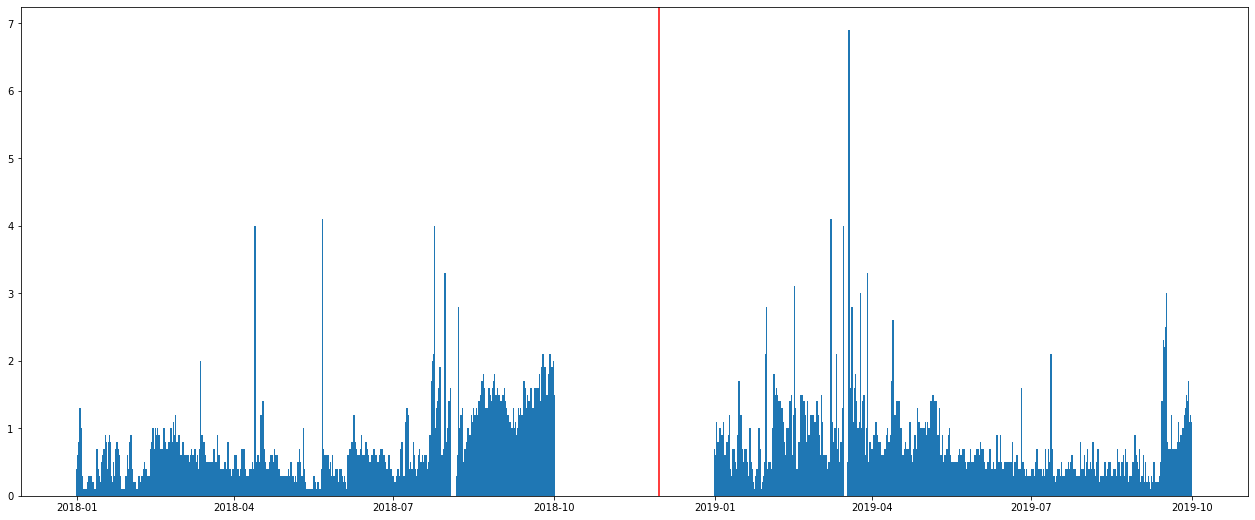

In [ ]:
air_q = air_q[air_q['MAGNITUD'] == 'CO'].set_index('TIMESTAMP')

# Plot
date = datetime.strptime("2018-11-30", '%Y-%m-%d')
plt.figure(figsize=(22,9))
plt.bar(
    air_q.index, 
    air_q['VALOR']
) 
plt.axvline(x=date, color='red')

### Segundo plot: medición de la diferencia

Esto no nos deja del todo bien observar si hay un impacto real... Vamos a plotear la diferencia punto a punto entre 2018 y 2019. Para ello vamos a realizar una serie de acciones:

**Resamplea los datos a frecuencia diaria, agregando con la media.**

In [ ]:
air_q = air_q.resample('D').mean()
air_q.head()
air_q.info()

,VALOR
TIMESTAMP,
2018-01-01,0.366667
2018-01-02,0.562500
2018-01-03,0.408333
2018-01-04,0.100000
2018-01-05,0.100000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 638 entries, 2018-01-01 to 2019-09-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALOR   541 non-null    float64
dtypes: float64(1)
memory usage: 10.0 KB


**Crea una nueva columna "MES_DIA", en la que para cada fila solo aparezca MES-DIA como un string.** E.g., para 2019-08-02 -> 08-02.

<img src="mes_dia.png" style="width: 100%">


In [ ]:
air_q['MES_DIA'] = air_q.index.map(lambda x: x.strftime('%m-%d'))
air_q.head()

,VALOR,MES_DIA
TIMESTAMP,,
2018-01-01,0.366667,01-01
2018-01-02,0.562500,01-02
2018-01-03,0.408333,01-03
2018-01-04,0.100000,01-04
2018-01-05,0.100000,01-05


**De `air_q`, selecciona las fechas entre '2019-01' y '2019-09', y setea "MES_DIA" como índice de esa selección.** Haz lo mismo para 2018.

<img src="final_form.png" style="width: 100%">


In [ ]:
table.head()
air_q2019 = air_q['2019-01': '2019-09'].set_index('MES_DIA') 
air_q2018 = air_q['2018-01': '2018-09'].set_index('MES_DIA')

MAGNITUD,CO,CO3,NO,NO2,NOx,SO2
TIMESTAMP,,,,,,
2018-01-01 00:00:00,0.4,32.60,2.0,22.0,25.0,6.0
2018-01-01 01:00:00,0.2,41.97,2.0,19.0,21.0,5.0
2018-01-01 02:00:00,0.3,30.16,3.0,29.0,34.0,5.0
2018-01-01 03:00:00,0.2,24.23,7.0,35.0,45.0,6.0
2018-01-01 04:00:00,0.2,24.16,13.0,38.0,57.0,6.0


**Resta ambas selecciones: gracias a que las operaciones se alinean por índice, habremos restado las medidas día a día**

In [ ]:
final_air_q = pd.DataFrame(air_q2019['VALOR'].sub(air_q2018['VALOR']))
final_air_q.head()

,VALOR
MES_DIA,
01-01,0.095833
01-02,-0.100000
01-03,-0.079167
01-04,0.375000
01-05,0.345833


**Plotea el resultado tal cual, y suavizado.** ¿Cuál es tu conclusión?

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'Resultado tal cual')

<BarContainer object of 273 artists>

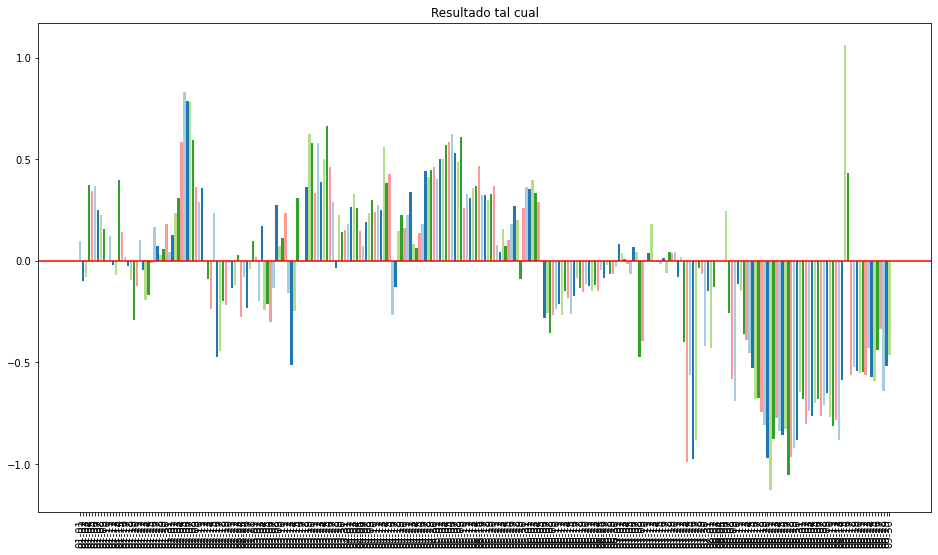

In [ ]:
# Plot Resultado tal cual
plt.xticks(rotation='vertical')
plt.title('Resultado tal cual')
plt.bar(
    final_air_q.index, 
    final_air_q['VALOR'],
    color=plt.cm.Paired(np.arange(0,5))
)
plt.axhline(0, color='red') 

In [ ]:
from ipywidgets import interact, widgets

try:
    from ipywidgets import interact, widgets
except:
    !pip install ipywidgets
    from ipywidgets import interact, widgets

In [ ]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(
    final_air_q.index, 
    final_air_q.values,
)

def update(w = 1):
    rolling = final_air_q.rolling(w, min_periods=1).mean()
    line.set_xdata(rolling.index)
    line.set_ydata(rolling.values)
    fig.canvas.draw_idle()

interact(update, w=widgets.IntSlider(min=1, max=60, step=1, value=1));

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=1, description='w', max=60, min=1), Output()), _dom_classes=('widget-int…

<IPython.core.display.Javascript object>

In [ ]:
# Plot Resultado por Rango Fecha (Usa 2019 como Referencia)

air_q2019 = air_q['2019-01': '2019-09']
final_air_q['TIMESTAMP'] = air_q2019.index
final_air_q = final_air_q.set_index('TIMESTAMP')

plt.title('Resultado por Rango Fecha (Usa 2019 como Referencia)')
plt.bar(
    final_air_q.index, 
    final_air_q['VALOR'],
    color=plt.cm.Paired(np.arange(5,10))
)
plt.axhline(0, color='red') 

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Resultado por Rango Fecha (Usa 2019 como Referencia)')

<BarContainer object of 273 artists>

<IPython.core.display.Javascript object>

In [ ]:
# Plot Resultado por Rango Fecha (Usa 1900 como Referencia)

air_q['MES_DIA'] = pd.to_datetime(air_q['MES_DIA'], format='%m-%d')
air_q2019 = air_q['2019-01': '2019-09'].set_index('MES_DIA') 
air_q2018 = air_q['2018-01': '2018-09'].set_index('MES_DIA')
final_air_q = pd.DataFrame(air_q2019['VALOR'].sub(air_q2018['VALOR']))

plt.title('Resultado por Rango Fecha (Usa 1900 como Referencia)')
plt.bar(
    final_air_q.index, 
    final_air_q['VALOR'],
    color=plt.cm.Paired(np.arange(8,12))
)
plt.axhline(0, color='red') 

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Resultado por Rango Fecha (Usa 1900 como Referencia)')

<BarContainer object of 273 artists>

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(
    final_air_q.index, 
    final_air_q.values,
)

def update(w = 1):
    rolling = final_air_q.rolling(w, min_periods=1).mean()
    line.set_xdata(rolling.index)
    line.set_ydata(rolling.values)
    fig.canvas.draw_idle()

interact(update, w=widgets.IntSlider(min=1, max=60, step=1, value=1));

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=1, description='w', max=60, min=1), Output()), _dom_classes=('widget-int…

<IPython.core.display.Javascript object>

In [ ]:
# Plot Resultado Suavisado por Meses
final_air_q['MONTH'] = final_air_q.index.month
final_air_q = final_air_q.set_index('MONTH')

x = range(10)
x_labels = ['','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

plt.xticks(x, x_labels)
plt.title('Resultado Suavisado por Meses')
plt.bar(
    final_air_q.index, 
    final_air_q['VALOR'],
    color=plt.cm.Paired(np.random.randint(10))
)
plt.axhline(0, color='red') 


<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x7f0998383358>,
 [Text(0, 0, ''),
  Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'August'),
  Text(0, 0, 'September')])

Text(0.5, 1.0, 'Resultado Suavisado por Meses')

<BarContainer object of 273 artists>

<IPython.core.display.Javascript object>